# k-means

In [19]:
import jax
import jax.numpy as jnp
import jax.random as random
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

from basic.clustering import KMeans

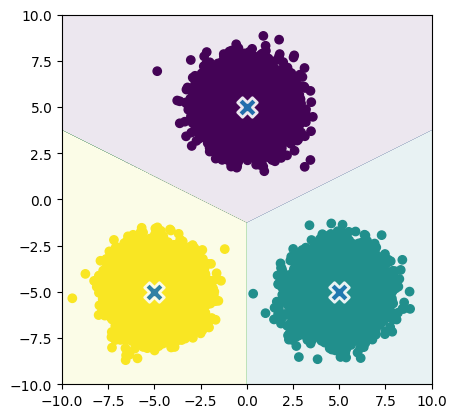

In [20]:
# training data
np.random.seed(0)

samples = 10000
x1 = np.random.normal(size=(samples, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(samples, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(samples, 2))
x3 += np.array([0, 5])
x_train = np.vstack((x1, x2, x3))

x0, x1 = np.meshgrid(np.linspace(-10, 10, samples), np.linspace(-10, 10, samples))
x = np.array([x0, x1]).reshape(2, -1).T

# seed
key1, key2 = random.split(random.PRNGKey(0), 2)

# k-means
k = 3
kmeans = KMeans()
centers, cluster = kmeans.fit(key1, k, x_train, max_iter=100)

plt.scatter(x_train[:, 0], x_train[:, 1], c=cluster)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, edgecolor="white")
plt.contourf(x0, x1, kmeans.predict(x, centers, cluster).reshape(samples, samples), alpha=0.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

